Excel file loaded successfully!
Columns in the file: ['Time', 'Forecast_Balance', 'Denormalized_Actual', 'Day_Number', 'Daily_Change_Actual', 'Cumulative_Change_Actual', 'Unnamed: 6']
Shape of the data: (30, 7)

First few rows:
        Time  Forecast_Balance  Denormalized_Actual  Day_Number  \
0 2024-11-21          0.380870         64173.957031           1   
1 2024-11-22          0.281527         47457.542969           2   
2 2024-11-23          0.273502         46107.171875           3   
3 2024-11-24          0.281802         47503.851562           4   
4 2024-11-25          0.347147         58499.421875           5   

   Daily_Change_Actual  Cumulative_Change_Actual  Unnamed: 6  
0                  NaN                  0.000000    57607.85  
1        -16716.414062             -16716.414062    57607.85  
2         -1350.371094             -18066.785156    57607.85  
3          1396.679688             -16670.105469    57607.85  
4         10995.570312              -5674.535156    57

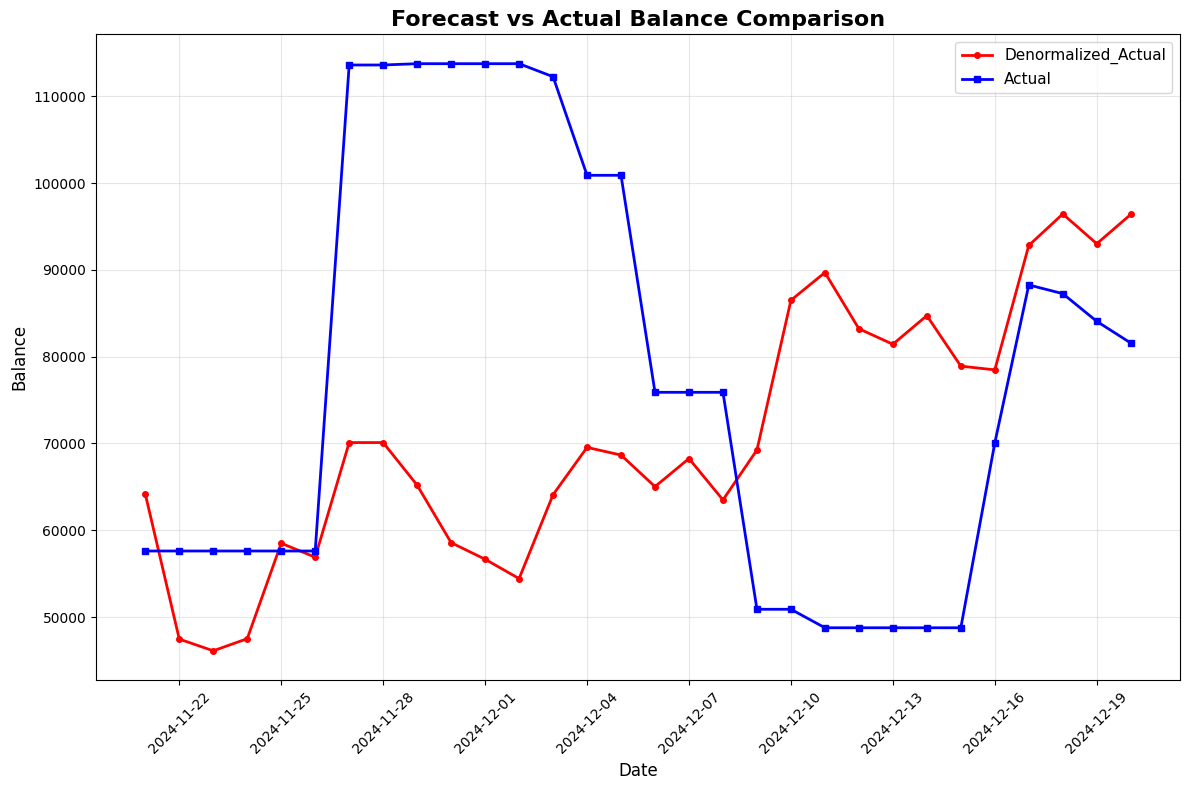


Data Statistics:
Number of data points: 30
Valid data points for error calculation: 30
Denormalized_Actual - Mean: 70854.29, Std: 14811.88
Actual - Mean: 77548.82, Std: 25204.16
Correlation between Denormalized_Actual and Actual: -0.1435

Error Metrics:
RMSE (Root Mean Square Error): 31217.4539
MSE (Mean Square Error): 974529427.6676
SMAPE (Symmetric Mean Absolute Percentage Error): 33.2087%


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

# Read the Excel file
try:
    df = pd.read_excel('forecast_final_with_actual.xlsx')
    print("Excel file loaded successfully!")
    print(f"Columns in the file: {list(df.columns)}")
    print(f"Shape of the data: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())
    
except FileNotFoundError:
    print("Error: forecast_final_with_actual.xlsx file not found!")
    exit()
except Exception as e:
    print(f"Error reading Excel file: {e}")
    exit()

# Check if required columns exist
required_columns = ['Denormalized_Actual', 'Unnamed: 6']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    print(f"Error: Missing required columns: {missing_columns}")
    print(f"Available columns: {list(df.columns)}")
    exit()

# Use 'Unnamed: 6' as actual values
actual_column = 'Unnamed: 6'

# Check for date column
date_columns = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
if not date_columns:
    # If no date column found, try to use index or create a date range
    print("No date column found. Using index as x-axis...")
    x_data = range(len(df))
    x_label = 'Index'
else:
    # Use the first date column found
    date_col = date_columns[0]
    print(f"Using '{date_col}' as date column")
    try:
        df[date_col] = pd.to_datetime(df[date_col])
        x_data = df[date_col]
        x_label = 'Date'
    except:
        print(f"Could not convert '{date_col}' to datetime. Using as string...")
        x_data = df[date_col]
        x_label = 'Date'

# Create the plot
plt.figure(figsize=(12, 8))

# Plot Denormalized_Actual in red
plt.plot(x_data, df['Denormalized_Actual'], color='red', linewidth=2, label='Denormalized_Actual', marker='o', markersize=4)

# Plot actual in blue
plt.plot(x_data, df[actual_column], color='blue', linewidth=2, label='Actual', marker='s', markersize=4)

# Customize the plot
plt.title('Forecast vs Actual Balance Comparison', fontsize=16, fontweight='bold')
plt.xlabel(x_label, fontsize=12)
plt.ylabel('Balance', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Format x-axis if it's a date
if x_label == 'Date':
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=max(1, len(df)//10)))
    plt.xticks(rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig('forecast_vs_actual_comparison.png', dpi=300, bbox_inches='tight')
print("Plot saved as 'forecast_vs_actual_comparison.png'")

# Show the plot
plt.show()

# Calculate error metrics
def calculate_rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

def calculate_mse(actual, predicted):
    return np.mean((actual - predicted) ** 2)

def calculate_smape(actual, predicted):
    return 100 * np.mean(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

# Remove any NaN values for calculations
mask = ~(df['Denormalized_Actual'].isna() | df[actual_column].isna())
actual_clean = df[actual_column][mask]
predicted_clean = df['Denormalized_Actual'][mask]

# Calculate metrics
rmse = calculate_rmse(actual_clean, predicted_clean)
mse = calculate_mse(actual_clean, predicted_clean)
smape = calculate_smape(actual_clean, predicted_clean)

# Print statistics and error metrics
print("\nData Statistics:")
print(f"Number of data points: {len(df)}")
print(f"Valid data points for error calculation: {len(actual_clean)}")
print(f"Denormalized_Actual - Mean: {df['Denormalized_Actual'].mean():.2f}, Std: {df['Denormalized_Actual'].std():.2f}")
print(f"Actual - Mean: {df[actual_column].mean():.2f}, Std: {df[actual_column].std():.2f}")
print(f"Correlation between Denormalized_Actual and Actual: {df['Denormalized_Actual'].corr(df[actual_column]):.4f}")

print("\nError Metrics:")
print(f"RMSE (Root Mean Square Error): {rmse:.4f}")
print(f"MSE (Mean Square Error): {mse:.4f}")
print(f"SMAPE (Symmetric Mean Absolute Percentage Error): {smape:.4f}%")
